<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
هایپرپارامترها
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف از این تمرین،‌ آشنایی عمیق‌تر با هایپرپارامترهای مختلف یک شبکه‌ی عصبی و تاثیر آن‌ها در عملکرد شبکه است. برای این کار به حل یک مسئله‌ی دسته‌بندی چندکلاسه تصویر خواهیم پرداخت، البته بدون استفاده از لایه‌های کانولوشنی، و سعی خواهیم کرد با تنظیم بهتر هایپرپارامترها به مدلی با عملکرد بهتر دست یابیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
با این‌که داده‌های این مسئله از جنس تصویر است اما به دلیل ساده بودن آن نیازی به استفاده از لایه‌های کانولوشنی نخواهیم داشت و در این تمرین باید از لایه‌های کاملاْ متصل (Fully Connected) استفاده کنید.
<br>
<span style="color:orange"><b>نکته:</b></span>
پیشنهاد می‌شود به دلیل احتمال طولانی‌شدن فرآیند آموزش مدل در سیستم شخصی شما، این نت‌بوک را روی گوگل کولب اجرا کنید.
</font>
</p>


In [ ]:
from scipy import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
‌خواندن داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ی این مسئله «هدی» نام دارد که برگرفته از <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167865507000037">این پژوهش</a> است و شامل تصویر ارقام دست‌نویس فارسی‌ست. هر تصویر با یک برچسب از ۰ تا ۹ مشخص شده است. این مجموعه‌داده را می‌توانید از فایل <code>hoda.mat</code> بخوانید. نیاز است ۴۰۰۰۰ تصویر نخست را به‌عنوان مجموعه‌ی آموزشی، ۱۰۰۰۰ تصویر بعد را به‌عنوان مجموعه‌ی اعتبارسنجی و ۱۰۰۰۰ تصویر آخر را به‌عنوان مجموعه‌ی آزمون در نظر بگیرید.
<br>
<span style="color:green"><b>راهنمایی ۱:</b></span>
برای خوانش این فایل می‌توانید از تابع <code>io.loadmat</code> از کتابخانه‌ی <code>scipy</code> استفاده کنید.
<br>
<span style="color:green"><b>راهنمایی ۲:</b></span>
نمونه‌ها در آرایه‌ای با نام <code>Data</code> و برچسب‌ها در آرایه‌ای با نام <code>labels</code> قرار گرفته‌اند.
برای دسترسی راحت‌تر به نمونه‌های مجموعه‌داده و جداسازی آن تابع <code>np.squeeze</code> به کمک شما می‌آید.
<br>
<span style="color:green"><b>راهنمایی ۳:</b></span>
اگر نت‌بوک را روی گوگل کولب اجرا می‌کنید برای دریافت آسان فایل مجموعه‌داده می‌توانید از کد زیر بهره ببرید تا فایل مربوطه به‌صورت مستقیم از گوگل درایو دانلود شود.
<center>
<code>!gdown 1LJcwIeUsswfpAnlPtYiFkGpIhQdeFHwq</code>
</center>

</font>
</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io

mat_file = '/content/drive/MyDrive/ai-delta/3_hyperparameters.zip (Unzipped Files)/hoda.mat'
data = scipy.io.loadmat(mat_file)
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011', '__version__': '1.0', '__globals__': [], 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0, 255, 255,   0],
               [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0, 255, 255, 255, 255],
               [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0, 255, 255, 255, 255,   0],
               [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0, 255, 255, 255, 255, 255,   0],
               [255, 255, 255, 255,   0,   0,   0,   0,  

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [ ]:
data_arr=np.squeeze(data['Data'])
data_arr.shape

(60000,)

In [ ]:
data["labels"].shape

(60000, 1)

In [ ]:
label_arr=np.squeeze(data["labels"])
label_arr.shape

(60000,)

In [ ]:
X_train = data_arr[:40000]
y_train =label_arr[:40000]
X_valid=data_arr[40000:50000]
y_valid=label_arr[40000:50000]
X_test =data_arr[50000:60000]
y_test =label_arr[50000:60000]

In [ ]:
# X_train = data[]
# None # Extract training data (40000 images)
# y_train = None # Extract training labels (40000 labels)
# X_valid = None # Extract validation data (10000 images)
# y_valid = None # Extract validation labels (10000 labels)
# X_test = None # Extract testing data (10000 images)
# y_test = None # Extract testing labels (10000 labels)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)
(10000,) (10000,)


In [ ]:
X_train[0].shape

(27, 20)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از خوانش و جداسازی نمونه‌ها، ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

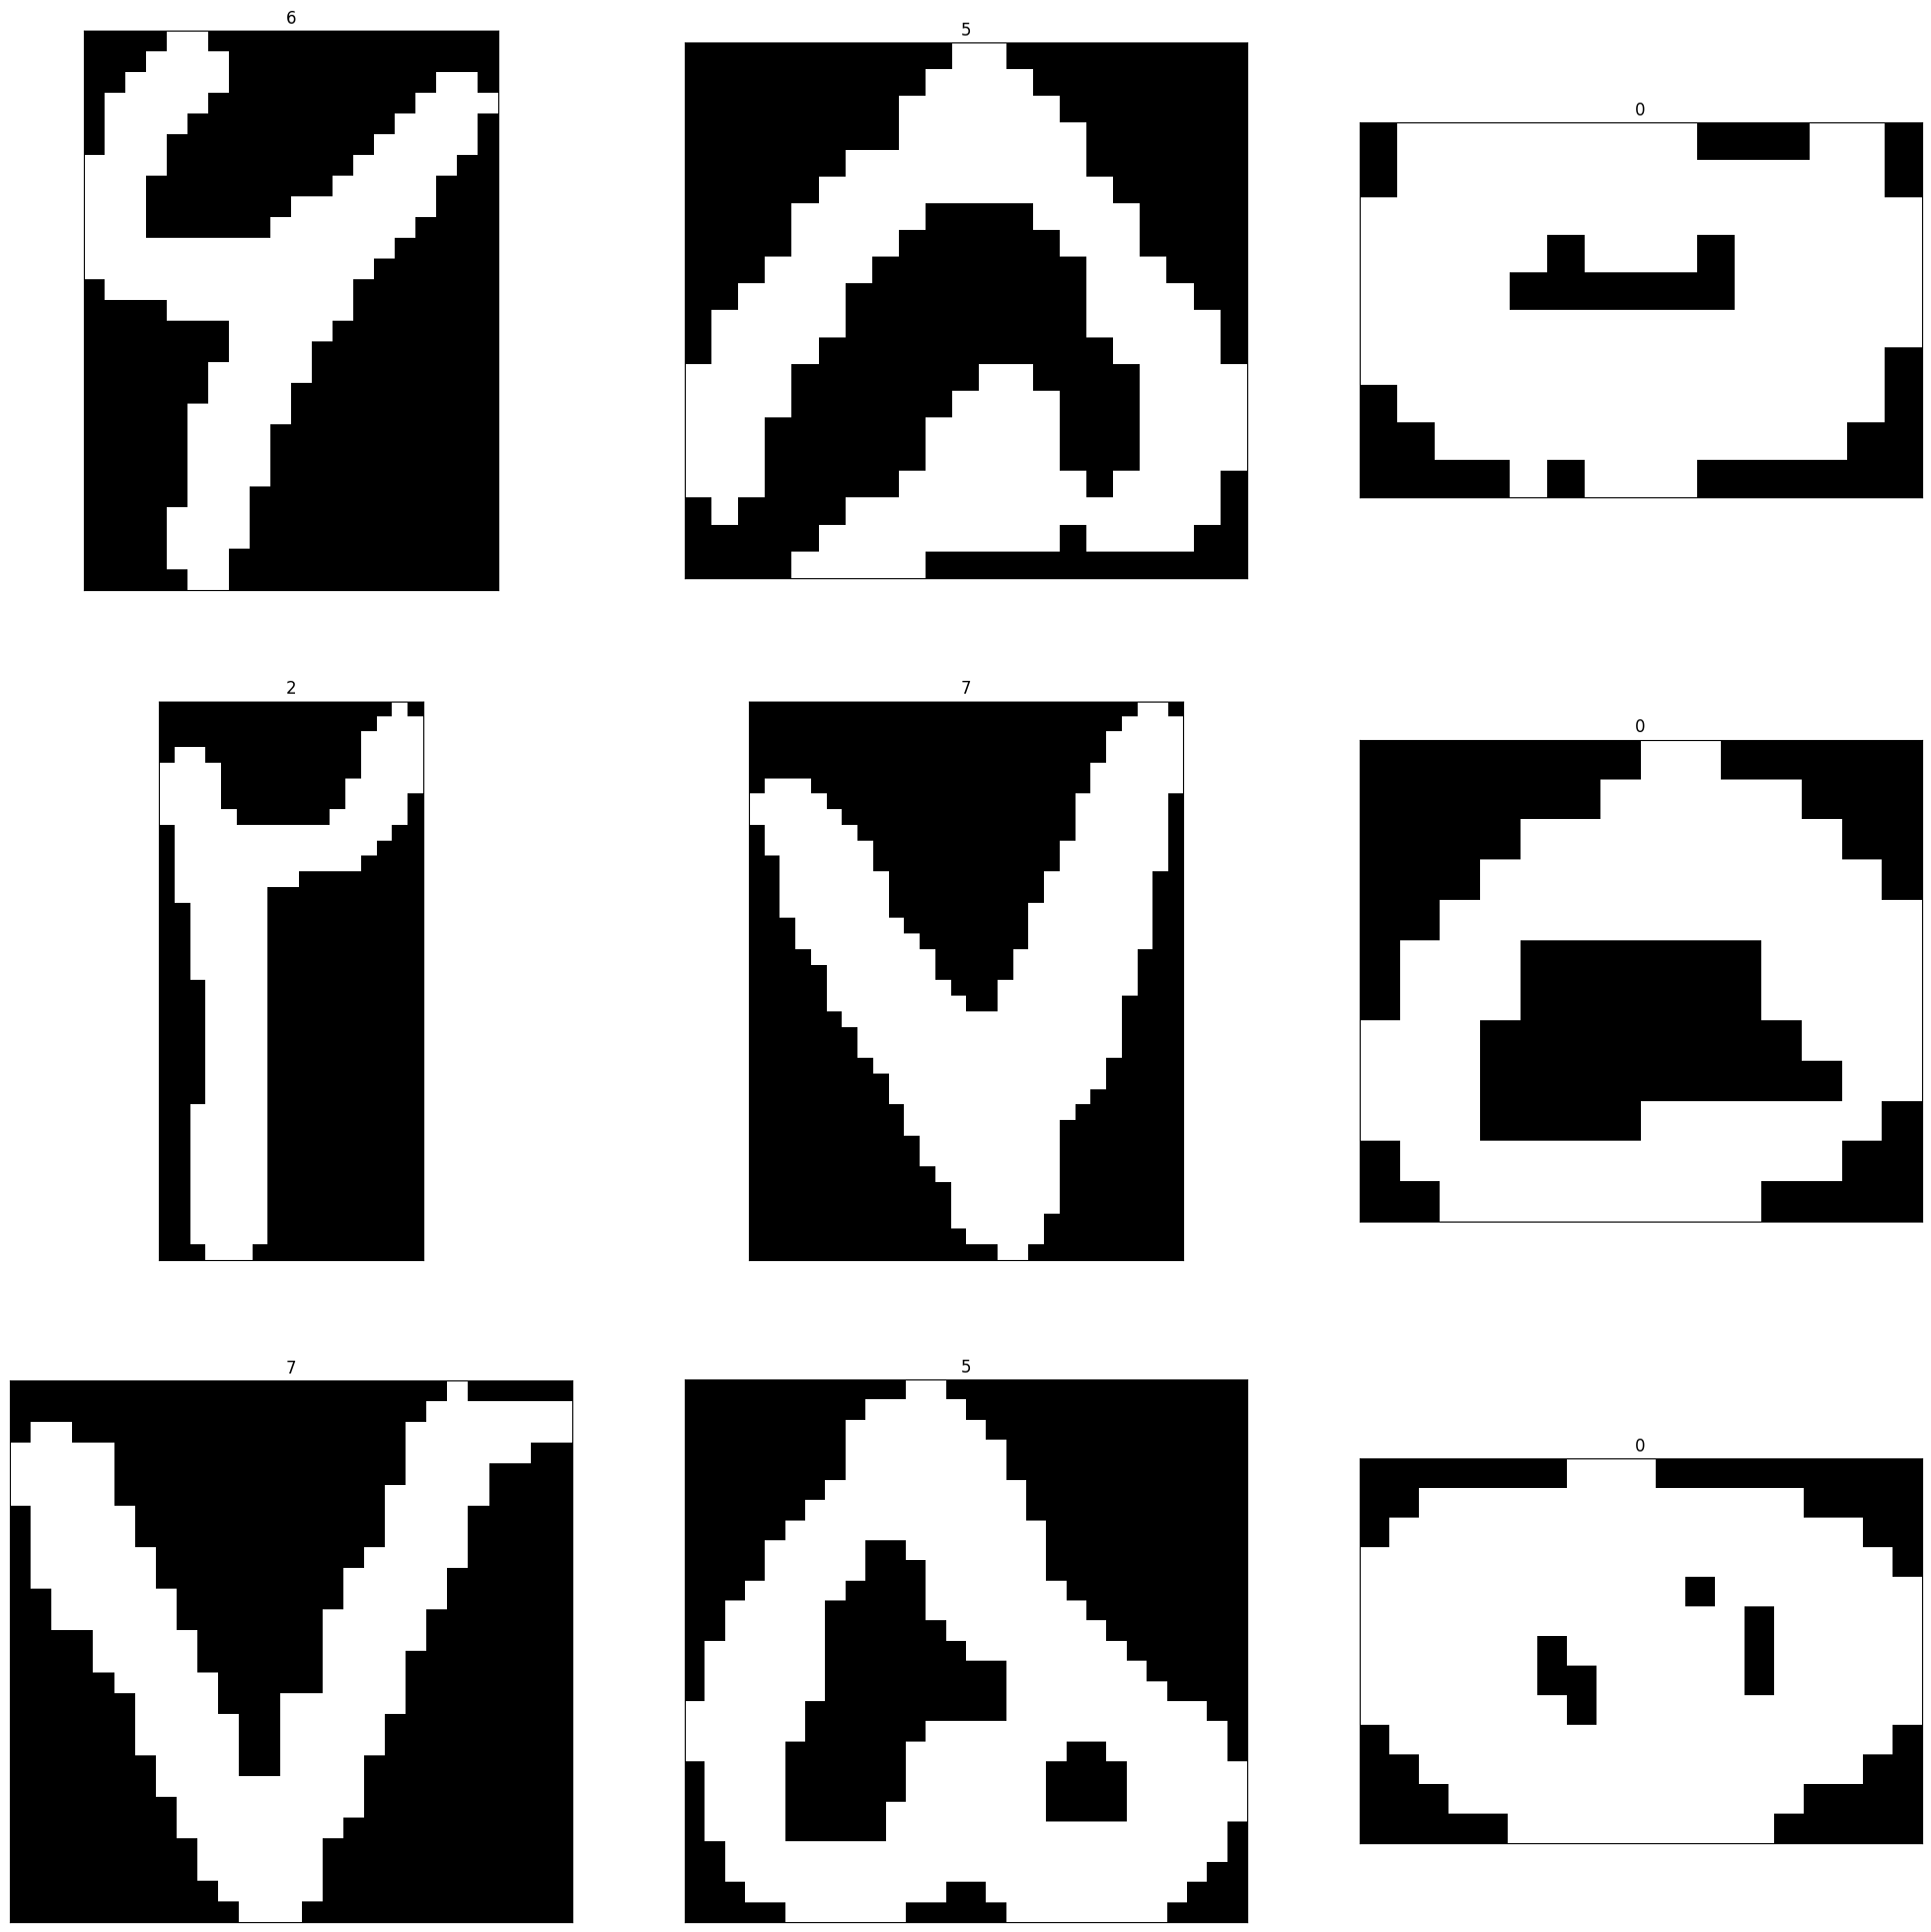

In [ ]:
# plot the first 9 images in the training set in a 3x3 grid
plt.figure(figsize=(25,25))
# fig, axs = plt.subplots(2, 2)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آماده‌سازی داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که احتمالاً از تصویرهای نمایش داده‌شده در بخش قبل متوجه شده‌اید تصاویر موجود در این مجموعه‌داده با اندازه‌های گوناگونی هستند. از آن‌جا که نیاز است ورودی‌های شبکه‌ی ما همگی با یک اندازه‌ی مشخص باشند نیاز است تصاویر را به یک اندازه‌ی مشابه نگاشت کنید. یک ایده این است که اندازه‌ی تصاویر خود را ۶۲ در ۶۲ در نظر بگیرید و هر تصویری که کوچک‌تر از این اندازه است را با اضافه کردن سطرها یا ستون‌های مشکی به اطراف آن به این اندازه برسانید، به‌نحوی که رقم دست‌نویس در وسط تصویر باقی بماند. بنابراین پیشنهاد می‌کنیم در این قسمت چنین روشی را پیاده‌سازی کنید. با این حال، اگر احساس می‌کنید قادر به پیاده‌سازی رویکرد بهتری هستید نیز آزاد هستید از آن استفاده کنید و توضیحاتی ارائه دهید. توجه داشته باشید باید این کار را برای تمام تصاویر موجود در تمام مجموعه‌ها (آموزشی، اعتبارسنجی و آزمون) انجام دهید.
</font>
</p>

In [ ]:
X_train[0].shape

(27, 20)

In [ ]:
### 0
def resize_image(image):
    target_size=(62, 62)
    row, col = image.shape
    resized_image = np.zeros(target_size)
    row_start_img = (target_size[0] - row) // 2
    col_start_img = (target_size[1] - col) // 2

    resized_image[
        row_start_img : row_start_img + row,
        col_start_img : col_start_img + col
    ] = image
    return resized_image

In [ ]:
X_train_resized = np.array([resize_image(img) for img in X_train])
X_valid_resized = np.array([resize_image(img) for img in X_valid])
X_test_resized= np.array([resize_image(img) for img in X_test])

In [ ]:
X_train_resized.shape

(40000, 62, 62)

In [ ]:
# X_train_resized=X_train
# X_valid_resized=X_valid
# X_test_resized=X_test
# for i in range (4000):
#   X_train_resized[i]=resize_image(X_train[i])

# for i in range (1000):
#   X_valid_resized[i]=resize_image(X_valid[i])
#   X_test_resized[i]=resize_image(X_test[i])

In [ ]:
X_train[0].shape

(62, 62)

In [ ]:
X_train_resized.shape

(40000, 62, 62)

In [ ]:
X_train_resized[0].shape

(62, 62)

In [ ]:
# for i in range (4000):
#   np.reshape(X_train[i], (62, 62))

In [ ]:
# ##1
# import cv2

# def __resize_image(src_image, dst_image_height, dst_image_width):
#     src_image_height = src_image.shape[0]
#     src_image_width = src_image.shape[1]

#     if src_image_height > dst_image_height or src_image_width > dst_image_width:
#         height_scale = dst_image_height / src_image_height
#         width_scale = dst_image_width / src_image_width
#         scale = min(height_scale, width_scale)
#         img = cv2.resize(src=src_image, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
#     else:
#         img = src_image

#     img_height = img.shape[0]
#     img_width = img.shape[1]

#     dst_image = np.zeros([dst_image_height, dst_image_width], dtype=np.uint8)

#     y_offset = (dst_image_height - img_height) // 2
#     x_offset = (dst_image_width - img_width) // 2

#     dst_image[y_offset:y_offset+img_height, x_offset:x_offset+img_width] = img

#     return dst_image

In [ ]:
# dst_image_height=62
# dst_image_width=62

In [ ]:
# X_train_resized=X_train
# X_valid_resized=X_valid
# X_test_resized=X_test
# for i in range (4000):
#   X_train_resized[i]=__resize_image(X_train[i], dst_image_height, dst_image_width)

# for i in range (1000):
#   X_valid_resized[i]=__resize_image(X_valid[i], dst_image_height, dst_image_width)
#   X_test_resized[i]=__resize_image(X_test[i], dst_image_height, dst_image_width)

IndexError: tuple index out of range

In [ ]:
# IMG_SIZE=62

In [ ]:
# ###2

# for i in range (4000):
#   X_train_resized[i]= X_train[i].reshape((IMG_SIZE, IMG_SIZE))

# for i in range (1000):
#   X_valid_resized[i]=X_valid[i].reshape((IMG_SIZE, IMG_SIZE))
#   X_test_resized[i]=X_test[i].reshape((IMG_SIZE, IMG_SIZE))


In [ ]:
# ### 3

# def __resize_image(src_image, dst_image_height, dst_image_width):
#   res = cv2.resize(src_image, dsize=(dst_image_height, dst_image_width), interpolation=cv2.INTER_CUBIC)
#   res_arr= np.array(res)
#   return res_arr

In [ ]:
X_train_resized.dtype

dtype('float64')

In [ ]:
print(X_train_resized)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
# X_train_resized = None # Resize training images to 62x62
# X_valid_resized = None # Resize validation images to 62x62
# X_test_resized = None # Resize testing images to 62x62

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از این تغییر اندازه، مجدد ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

In [ ]:
# plot the first 9 images in the training set in a 3x3 grid after resizing

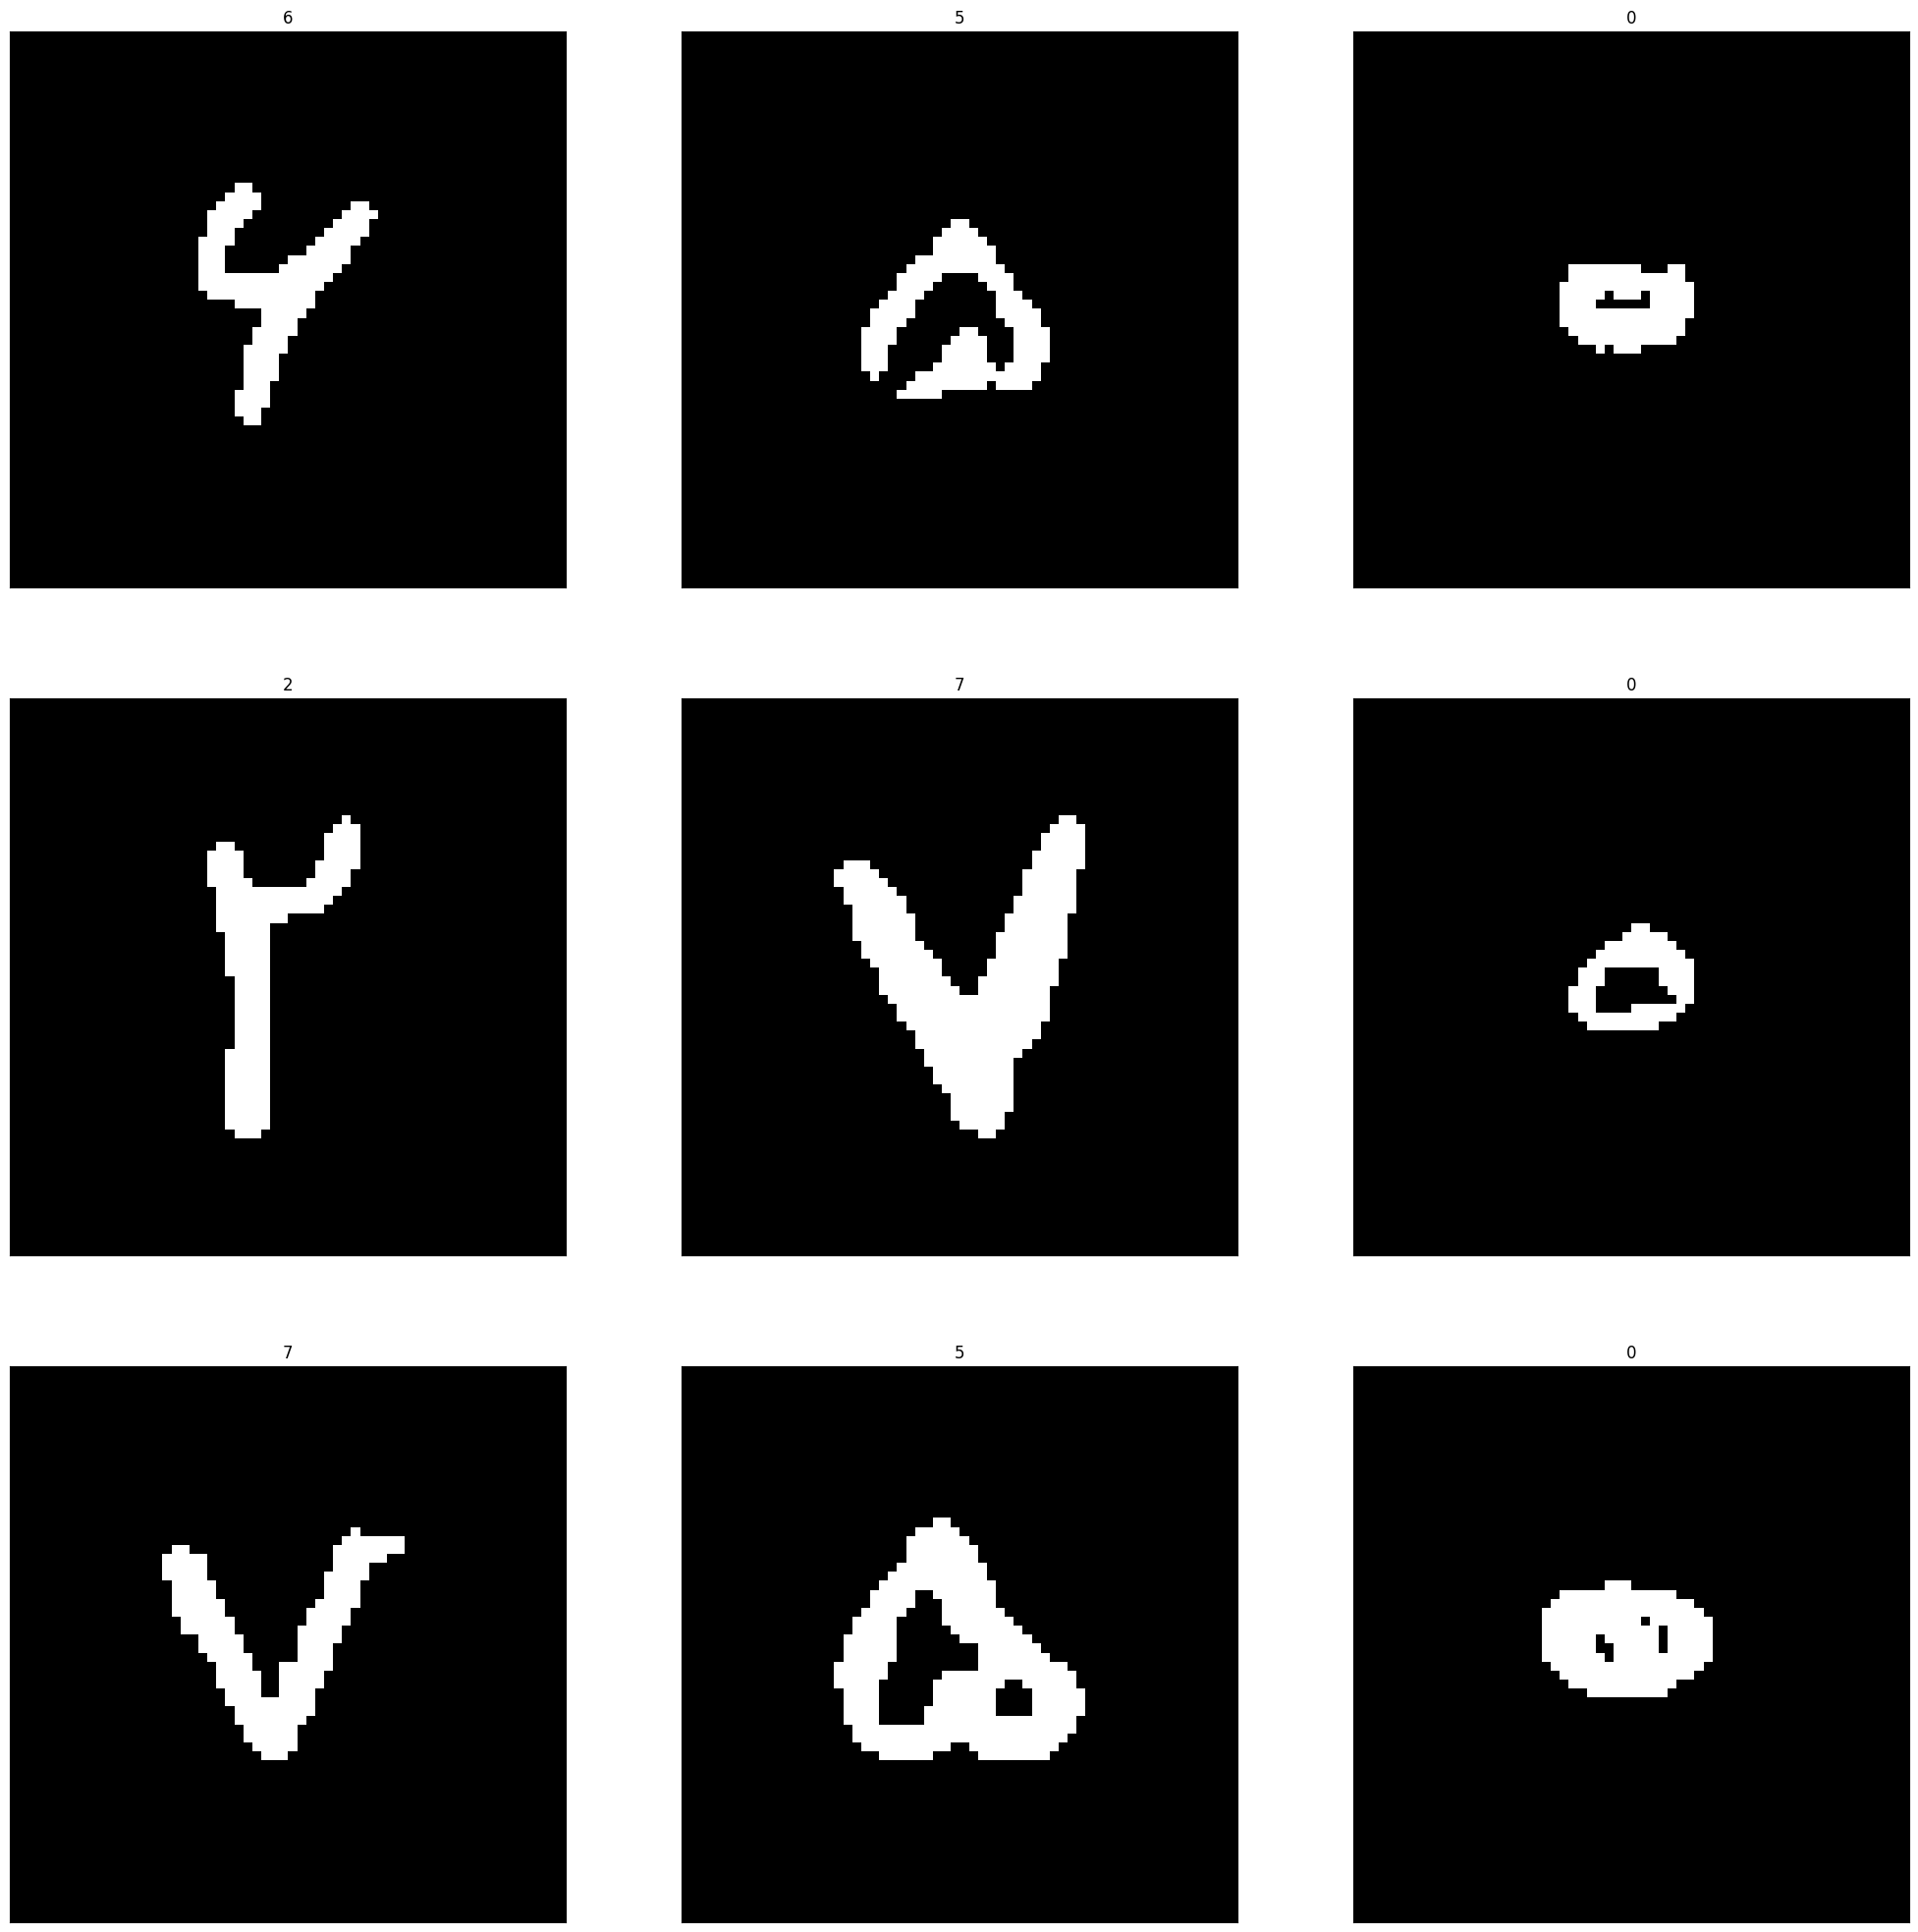

In [ ]:
plt.figure(figsize=(25,25))
# fig, axs = plt.subplots(2, 2)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train_resized[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آن‌جا که شبکه‌ی عصبی مورد استفاده در این تمرین یک شبکه‌ی عمیق کاملاً متصل خواهد بود، ورودی شبکه باید به‌شکل یک بردار باشد، و نه ماتریس. بنابراین در این قسمت نیاز است هر تصویر را مسطح کرده و به شکل یک بردار نشان دهید. یعنی هر تصویر ۶۲ در ۶۲ شما باید به شکل یک بردار ۳۸۴۴ بازنمایی شود.
</font>
</p>

In [ ]:
X_train_vectorized = np.array([img.flatten() for img in X_train_resized ])
X_valid_vectorized = np.array([img.flatten() for img in X_valid_resized ])
X_test_vectorized = np.array([img.flatten() for img in X_test_resized ])

In [ ]:
# X_train_vectorized =X_train_resized
# X_valid_vectorized =X_valid_resized
# X_test_vectorized=X_test_resized
# for i in range (4000):
#   X_train_vectorized[i]= X_train_resized[i].flatten()

# for i in range (1000):
#   X_valid_vectorized[i]= X_valid_resized[i].flatten()
#   X_test_vectorized[i]= X_test_resized[i].flatten()

In [ ]:
X_train_vectorized.shape

(40000, 3844)

In [ ]:
# X_train_vectorized = None # Vectorize training images
# X_valid_vectorized = None # Vectorize validation images
# X_test_vectorized = None # Vectorize testing images

print(X_train_vectorized.shape)
print(X_valid_vectorized.shape)
print(X_test_vectorized.shape)

(40000, 3844)
(10000, 3844)
(10000, 3844)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر این، به دلیل آسان‌تر شدن فرآیند آموزش مدل پیشنهاد می‌شود مقادیر هر تصویر که شامل اعداد ۰ تا ۲۵۵ هستند را به بازه‌ی ۰ تا ۱ نرمال کنید. برای این‌کار می‌توانید به‌سادگی مقادیر را تقسیم بر ۲۵۵ کنید.
</font>
</p>

In [ ]:
X_train_normalized = X_train_vectorized/255  # Normalize training images
X_valid_normalized = X_valid_vectorized/255  # Normalize validation images
X_test_normalized = X_test_vectorized/255 # Normalize testing images

In [ ]:
X_train_normalized.shape

(40000, 3844)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همچنین با توجه به این‌که مسئله‌ی ما چندکلاسه است نیاز است خروجی شبکه به‌صورت بردار تک‌نمود (One-Hot) باشد.
بنابراین در این قسمت نیاز است برچسب‌ها را به کمک تابع <code>to_categorical</code> از کتابخانه‌ی <code>keras.utils</code> به این شکل تبدیل کنید.
</font>
</p>

In [ ]:
import keras

In [ ]:
 y_train_onehot =keras.utils.to_categorical( y_train, num_classes=10)
 y_valid_onehot=keras.utils.to_categorical(  y_valid, num_classes=10)
 y_test_onehot=keras.utils.to_categorical(  y_test, num_classes=10)

In [ ]:
# y_train_onehot = None # One-hot encode training labels
# y_valid_onehot = None # One-hot encode validation labels
# y_test_onehot = None # One-hot encode testing labels

print(y_train_onehot.shape)
print(y_valid_onehot.shape)
print(y_test_onehot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت می‌خواهیم مرحله به مرحله چند ساختار شبکه‌ی مختلف را مورد آزمایش قرار دهیم و عملکرد هرکدام از آن‌ها را روی یک نمودار واحد نمایش دهیم تا قادر به مقایسه و تحلیل آن‌ها باشیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
تاریخچه‌ی عملکرد هر مدل روی مجموعه‌ی اعتبارسنجی (دقت مدل در هر دور) را به‌صورت جداگانه نگه دارید زیرا که نیاز است در آخر یک نمودار مشترک از آن‌ها رسم کنید.
</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل اول
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا شبکه‌ای بسازید که در لایه‌ی ورودی شامل ۶۴ نورون باشد و از تابع فعال‌سازی <code>tanh</code> استفاده کنید. سپس یک لایه‌ی کاملاً متصل با ۱۰ نورون به‌عنوان لایه‌ی خروجی قرار داده و از تابع فعال‌سازی <code>softmax</code> استفاده کنید. در نهایت از تابع <code>categorical_crossentropy</code> به‌عنوان تابع هزینه استفاده کنید و تابع بهینه‌ساز را معادل <code>SGD</code> با نرخ یادگیری <code>0.01</code> قرار دهید.
<br>
علاوه بر این، برای آموزش مدل از تکنیک <code>EarlyStopping</code> استفاده کنید تا نیاز به آموزش بی‌رویه‌ی مدل نباشد. می‌توانید مانیتور آن را روی <code>`val_loss`</code> و <code>patience</code> آن را روی <code>10</code> تنظیم کنید.
<br>
در انتها مدل خود را برای ۱۰۰ دور و با اندازه‌ی دسته معادل ۳۲ آموزش دهید.
</font>
</p>

In [ ]:
import keras
from keras import layers

In [ ]:
model1 = Sequential()
model1.add(layers.Dense(64,activation='tanh',input_shape=(3844,)))
model1.add(layers.Dense(10, activation='softmax'))
# Add a dense layer with 64 neurons and tanh activation
# Add a dense layer with 10 neurons and softmax activation

In [ ]:
optimizer_SGD = keras.optimizers.SGD(learning_rate=0.001)
model1.compile( loss= keras.losses.categorical_crossentropy, optimizer=optimizer_SGD, metrics=['accuracy'])

In [ ]:
# model1.compile(None) # To-Do (Compile the model)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# To-Do (Stop training when validation loss does not improve for 10 epochs)

In [ ]:
history1 = model1.fit(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping],batch_size=32, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0973 - accuracy: 0.7760 - val_loss: 0.6698 - val_accuracy: 0.8639
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5590 - accuracy: 0.8802 - val_loss: 0.4924 - val_accuracy: 0.8832
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4458 - accuracy: 0.8946 - val_loss: 0.4179 - val_accuracy: 0.8958
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3891 - accuracy: 0.9033 - val_loss: 0.3743 - val_accuracy: 0.9041
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3531 - accuracy: 0.9100 - val_loss: 0.3444 - val_accuracy: 0.9105
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3274 - accuracy: 0.9156 - val_loss: 0.3223 - val_accuracy: 0.9157
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3079 - accuracy: 0.9196 - val_loss: 0.3052 - val_ac

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
عملکرد مدل نهایی را روی مجموعه‌ی اعتبارسنجی گزارش کنید. علاوه بر این نمودار دقت مدل را برای مجموعه‌ی آموزشی و آزمون در یک نمودار واحد نشان دهید.
</font>
</p>

In [ ]:
loss1, accuracy1 = model1.evaluate(X_valid_normalized  ,  y_valid_onehot, verbose = 0) # To-Do (Evaluate the model on train data)
print(f"Valid Loss: {loss1:.4f}, Valid Accuracy: {accuracy1:.4f}")

Valid Loss: 0.1238, Valid Accuracy: 0.9657


In [ ]:
loss1_tr, accuracy1_tr = model1.evaluate(X_train_normalized ,y_train_onehot)
print(f"Train Loss: {loss1_tr:.4f}, Train Accuracy: {accuracy1_tr :.4f}")

1250/1250 [==============================] - 5s 4ms/step - loss: 0.1044 - accuracy: 0.9737
Train Loss: 0.1044, Train Accuracy: 0.9737


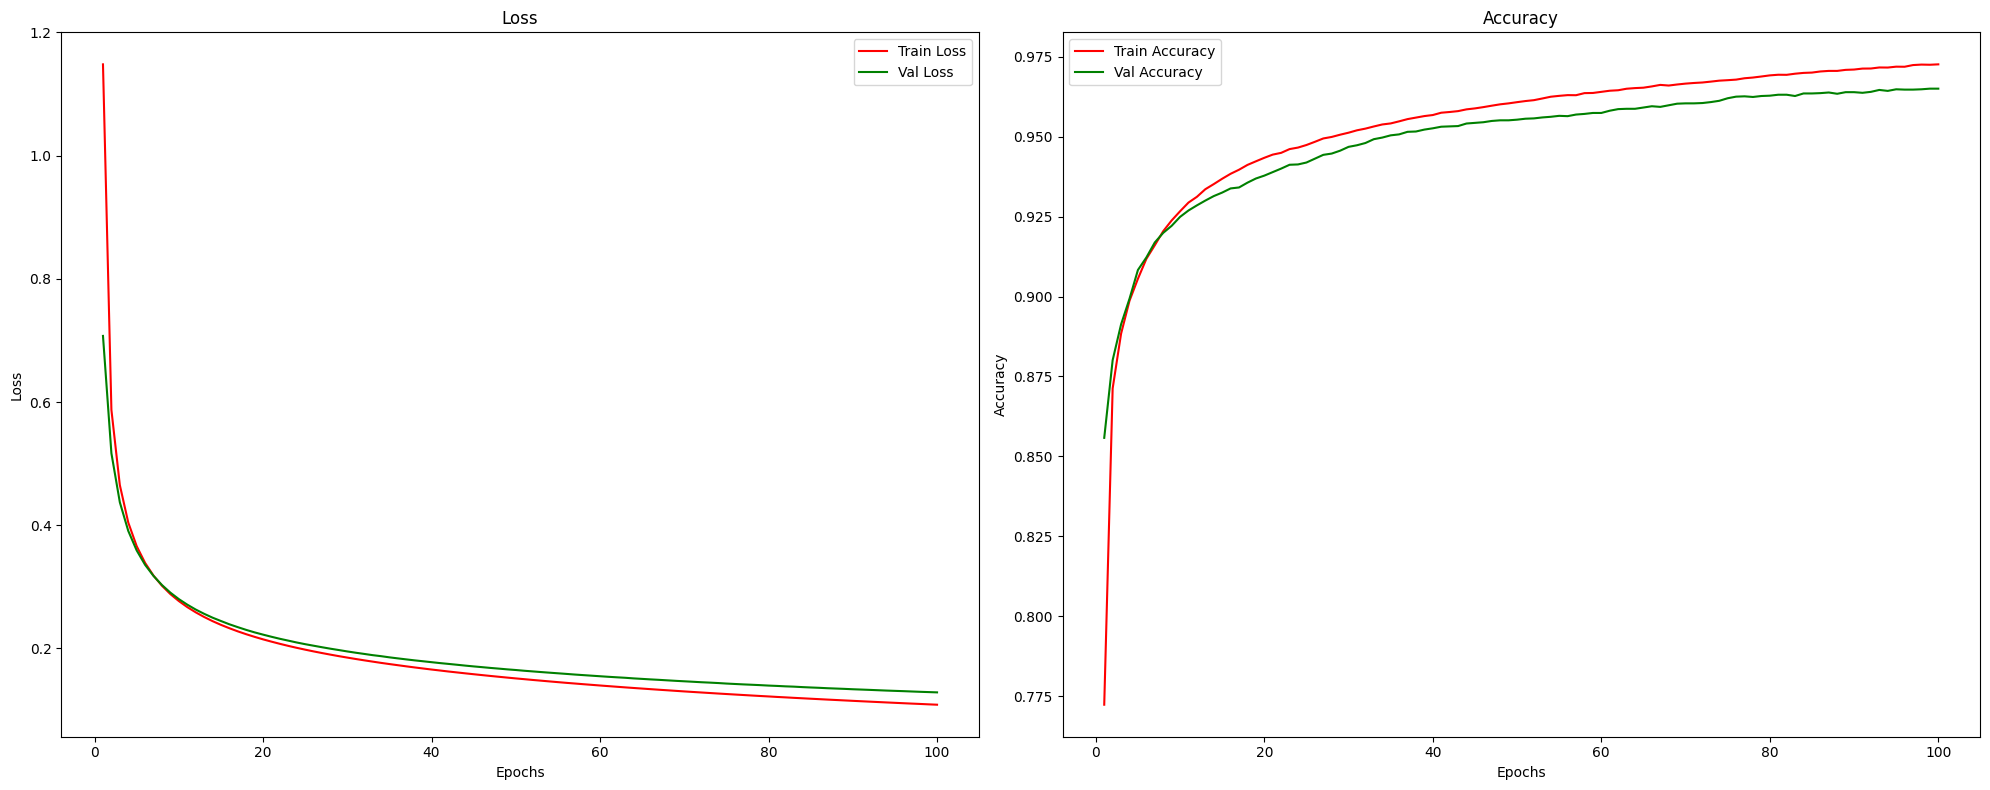

In [ ]:
tr_acc = history1.history['accuracy']
tr_loss = history1.history['loss']
val_acc =history1.history['val_accuracy']
val_loss = history1.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Val Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
loss1_test, accuracy1_test = model1.evaluate(X_test_normalized ,y_test_onehot)
print(f"Test Loss: {loss1_tr:.4f}, Test Accuracy: {accuracy1_tr :.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1249 - accuracy: 0.9641
Test Loss: 0.1044, Test Accuracy: 0.9737


In [ ]:
# To-Do (Final accuracy on validation data)

In [ ]:
# To-Do (Plot training and validation accuracy)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل دوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون مدل دیگری طراحی کنید که مشابه با مدل قبل بوده و تنها تابع فعال‌ساز آن در لایه‌ی نخست <code>ReLU</code> باشد. مراحل قبل را در این مدل نیز تکرار کنید.
</font>
</p>

In [ ]:
model2 = Sequential()
model2.add(layers.Dense(64,activation='relu',input_shape=(3844,)))
model2.add(layers.Dense(10, activation='softmax'))
# Add a dense layer with 64 neurons and ReLU activation
# Add a dense layer with 10 neurons and softmax activation

In [ ]:
optimizer_SGD = keras.optimizers.SGD(learning_rate=0.001)
model2.compile( loss= keras.losses.categorical_crossentropy, optimizer=optimizer_SGD, metrics=['accuracy'])
EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history2 = model2.fit(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping],batch_size=32, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3509 - accuracy: 0.7179 - val_loss: 0.7713 - val_accuracy: 0.8574
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5947 - accuracy: 0.8761 - val_loss: 0.4969 - val_accuracy: 0.8831
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4372 - accuracy: 0.8921 - val_loss: 0.4051 - val_accuracy: 0.8957
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3707 - accuracy: 0.9037 - val_loss: 0.3569 - val_accuracy: 0.9048
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3318 - accuracy: 0.9121 - val_loss: 0.3252 - val_accuracy: 0.9127
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3055 - accuracy: 0.9190 - val_loss: 0.3031 - val_accuracy: 0.9181
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2862 - accuracy: 0.9234 - val_loss: 0.2861 - val_a

In [ ]:
loss2, accuracy2 = model2.evaluate(X_valid_normalized  ,  y_valid_onehot, verbose = 0) # To-Do (Evaluate the model on train data)
print(f"Valid Loss: {loss2:.4f}, Valid Accuracy: {accuracy2:.4f}")

Valid Loss: 0.1203, Valid Accuracy: 0.9681


In [ ]:
loss2_tr, accuracy2_tr = model2.evaluate(X_train_normalized ,y_train_onehot)
print(f"Train Loss: {loss2_tr:.4f}, Train Accuracy: {accuracy2_tr :.4f}")

1250/1250 [==============================] - 3s 2ms/step - loss: 0.0964 - accuracy: 0.9760
Train Loss: 0.0964, Train Accuracy: 0.9760


In [ ]:
loss2_test, accuracy2_test = model2.evaluate(X_test_normalized ,y_test_onehot)
print(f"Test Loss: {loss2_tr:.4f}, Test Accuracy: {accuracy2_tr :.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9673
Test Loss: 0.0964, Test Accuracy: 0.9760


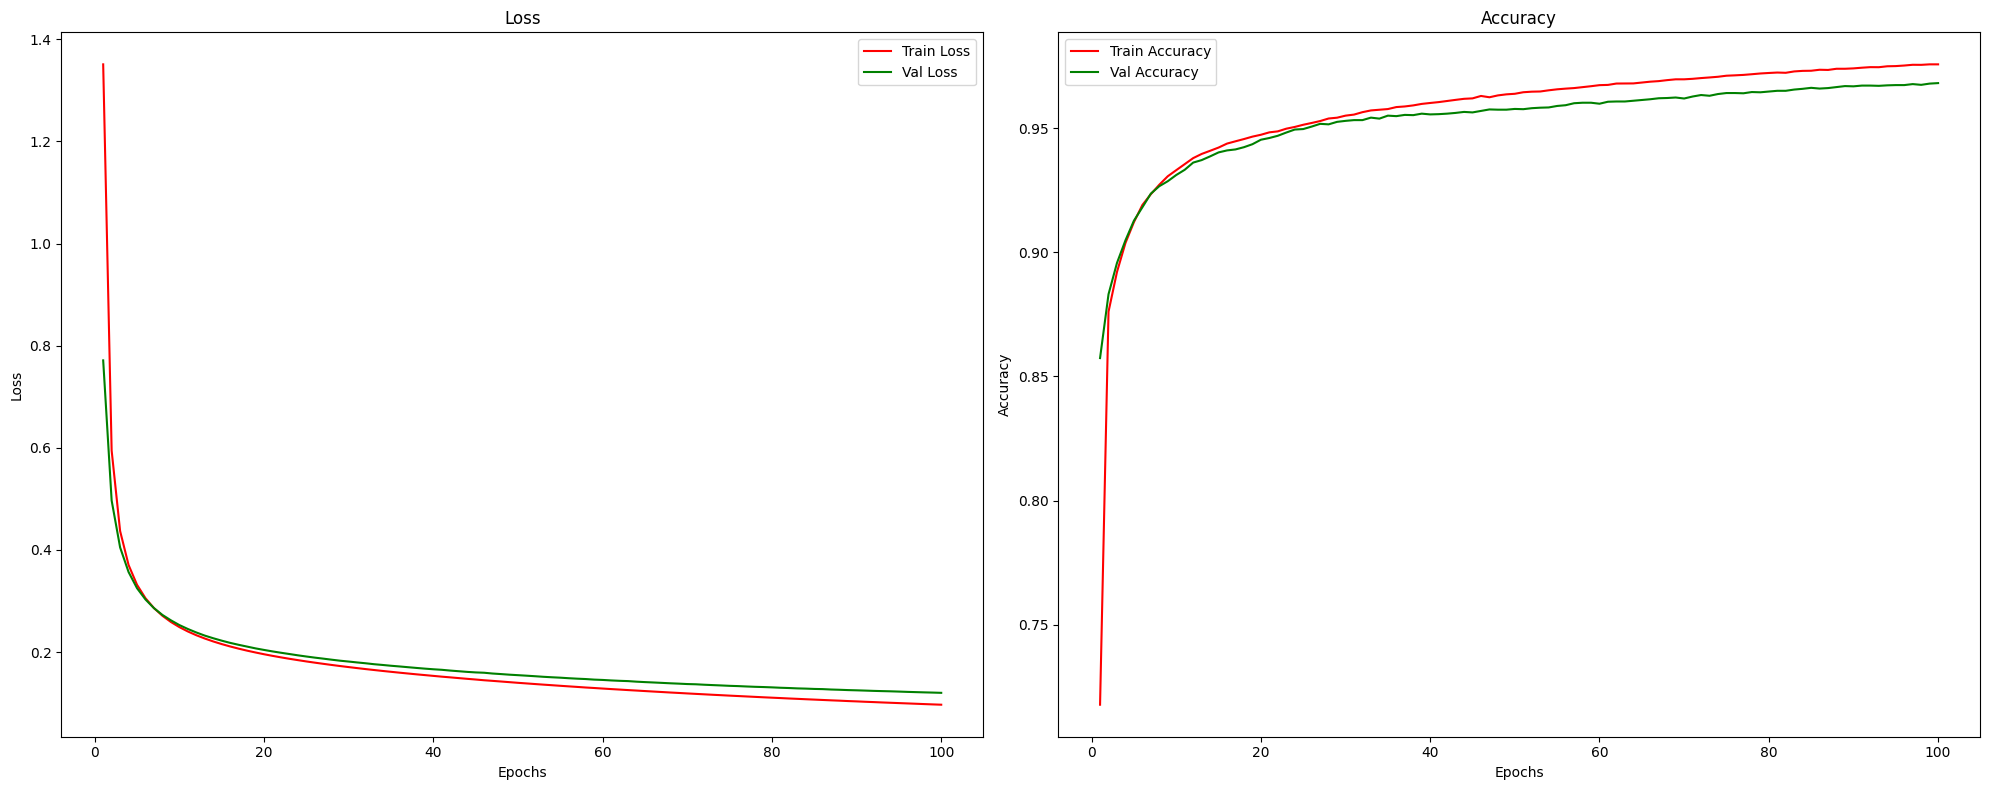

In [ ]:
tr_acc = history2.history['accuracy']
tr_loss = history2.history['loss']
val_acc =history2.history['val_accuracy']
val_loss = history2.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Val Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# To-Do (Final accuracy on validation data)

In [ ]:
# To-Do (Plot training and validation accuracy)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل سوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون یک مدل مشابه مدل قبل طراحی کرده اما بین لایه‌ی ورودی و خروجی یک لایه‌ی کاملاً متصل دیگر شامل ۲۵۶ نورون قرار دهید و از تابع فعال‌سازی <code>relu</code> استفاده کنید. مراحل قبل را تکرار کنید.
</font>
</p>

In [ ]:
model3 = Sequential()
model3.add(layers.Dense(64,activation='relu',input_shape=(3844,)))
model3.add(layers.Dense(256,activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
# Add a dense layer with 64 neurons and ReLU activation
# Add a dense layer with 256 neurons and ReLU activation
# Add a dense layer with 10 neurons and softmax activation

In [ ]:
optimizer_SGD = keras.optimizers.SGD(learning_rate=0.001)
model3.compile( loss= keras.losses.categorical_crossentropy, optimizer=optimizer_SGD, metrics=['accuracy'])
EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history3 = model3.fit(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping],batch_size=32, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9880 - accuracy: 0.4522 - val_loss: 1.5443 - val_accuracy: 0.7239
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0747 - accuracy: 0.8101 - val_loss: 0.7428 - val_accuracy: 0.8480
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5862 - accuracy: 0.8666 - val_loss: 0.4945 - val_accuracy: 0.8771
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4318 - accuracy: 0.8876 - val_loss: 0.3986 - val_accuracy: 0.8915
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3608 - accuracy: 0.9013 - val_loss: 0.3456 - val_accuracy: 0.9030
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3182 - accuracy: 0.9109 - val_loss: 0.3107 - val_accuracy: 0.9110
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2893 - accuracy: 0.9183 - val_loss: 0.2862 - val_ac

In [ ]:
loss3, accuracy3 = model3.evaluate(X_valid_normalized  ,  y_valid_onehot, verbose = 0) # To-Do (Evaluate the model on train data)
print(f"Valid Loss: {loss3:.4f}, Valid Accuracy: {accuracy3:.4f}")

Valid Loss: 0.1020, Valid Accuracy: 0.9725


In [ ]:
loss3_tr, accuracy3_tr = model3.evaluate(X_train_normalized ,y_train_onehot)
print(f"Train Loss: {loss3_tr:.4f}, Train Accuracy: {accuracy3_tr :.4f}")

1250/1250 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9822
Train Loss: 0.0708, Train Accuracy: 0.9822


In [ ]:
loss3_test, accuracy3_test = model2.evaluate(X_test_normalized ,y_test_onehot)
print(f"Test Loss: {loss3_tr:.4f}, Test Accuracy: {accuracy3_tr :.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9673
Test Loss: 0.0708, Test Accuracy: 0.9822


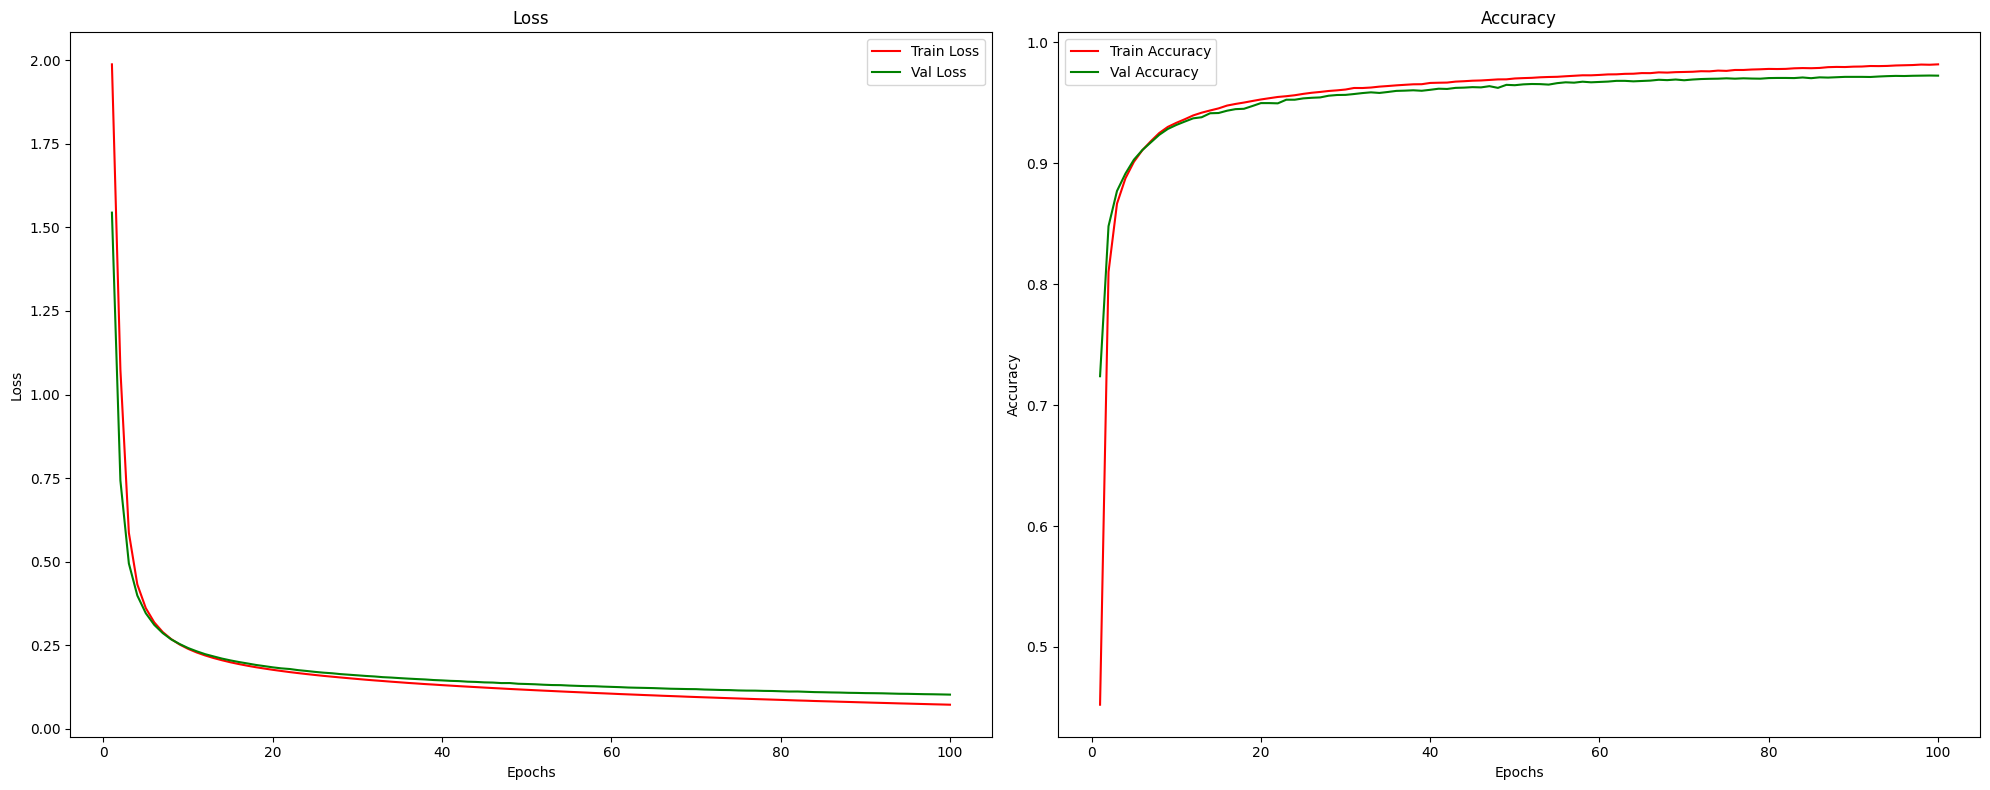

In [ ]:
tr_acc = history3.history['accuracy']
tr_loss = history3.history['loss']
val_acc =history3.history['val_accuracy']
val_loss = history3.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Val Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# To-Do (Final accuracy on validation data)

In [ ]:
# To-Do (Plot training and validation accuracy)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل چهارم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون توابع فعال‌ساز <code>ReLU</code> مدل قبل را به <code>LeakyReLU</code> با آلفای <code>0.1</code> تغییر دهید و مراحل قبل را تکرار کنید.
</font>
</p>

In [ ]:
from keras.layers import LeakyReLU


In [ ]:
model4 = Sequential()
activator=keras.layers.LeakyReLU(alpha=0.1)
model4.add(layers.Dense(64,activation=activator ,input_shape=(3844,)))
model4.add(layers.Dense(256,activation=activator) )
model4.add(layers.Dense(10, activation='softmax'))
# Add a dense layer with 64 neurons and LeakyReLU activation
# Add a dense layer with 256 neurons and LeakyReLU activation
# Add a dense layer with 10 neurons and softmax activation

In [ ]:
optimizer_SGD = keras.optimizers.SGD(learning_rate=0.001)
model4.compile( loss= keras.losses.categorical_crossentropy, optimizer=optimizer_SGD, metrics=['accuracy'])
EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history4 = model4.fit(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping],batch_size=32, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8847 - accuracy: 0.5640 - val_loss: 1.3434 - val_accuracy: 0.7954
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9150 - accuracy: 0.8383 - val_loss: 0.6421 - val_accuracy: 0.8600
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5236 - accuracy: 0.8741 - val_loss: 0.4519 - val_accuracy: 0.8812
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4019 - accuracy: 0.8921 - val_loss: 0.3738 - val_accuracy: 0.8952
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3431 - accuracy: 0.9050 - val_loss: 0.3295 - val_accuracy: 0.9075
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3070 - accuracy: 0.9132 - val_loss: 0.3003 - val_accuracy: 0.9152
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2819 - accuracy: 0.9198 - val_loss: 0.2795 - val_ac

In [ ]:
loss4, accuracy4 = model4.evaluate(X_valid_normalized  ,  y_valid_onehot, verbose = 0) # To-Do (Evaluate the model on train data)
print(f"Valid Loss: {loss4:.4f}, Valid Accuracy: {accuracy4:.4f}")

Valid Loss: 0.1099, Valid Accuracy: 0.9709


In [ ]:
loss4_tr, accuracy4_tr = model4.evaluate(X_train_normalized ,y_train_onehot)
print(f"Train Loss: {loss4_tr:.4f}, Train Accuracy: {accuracy4_tr :.4f}")

1250/1250 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9804
Train Loss: 0.0796, Train Accuracy: 0.9804


In [ ]:
loss4_test, accuracy4_test = model4.evaluate(X_test_normalized ,y_test_onehot)
print(f"Test Loss: {loss4_tr:.4f}, Test Accuracy: {accuracy4_tr :.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1075 - accuracy: 0.9706
Test Loss: 0.0796, Test Accuracy: 0.9804


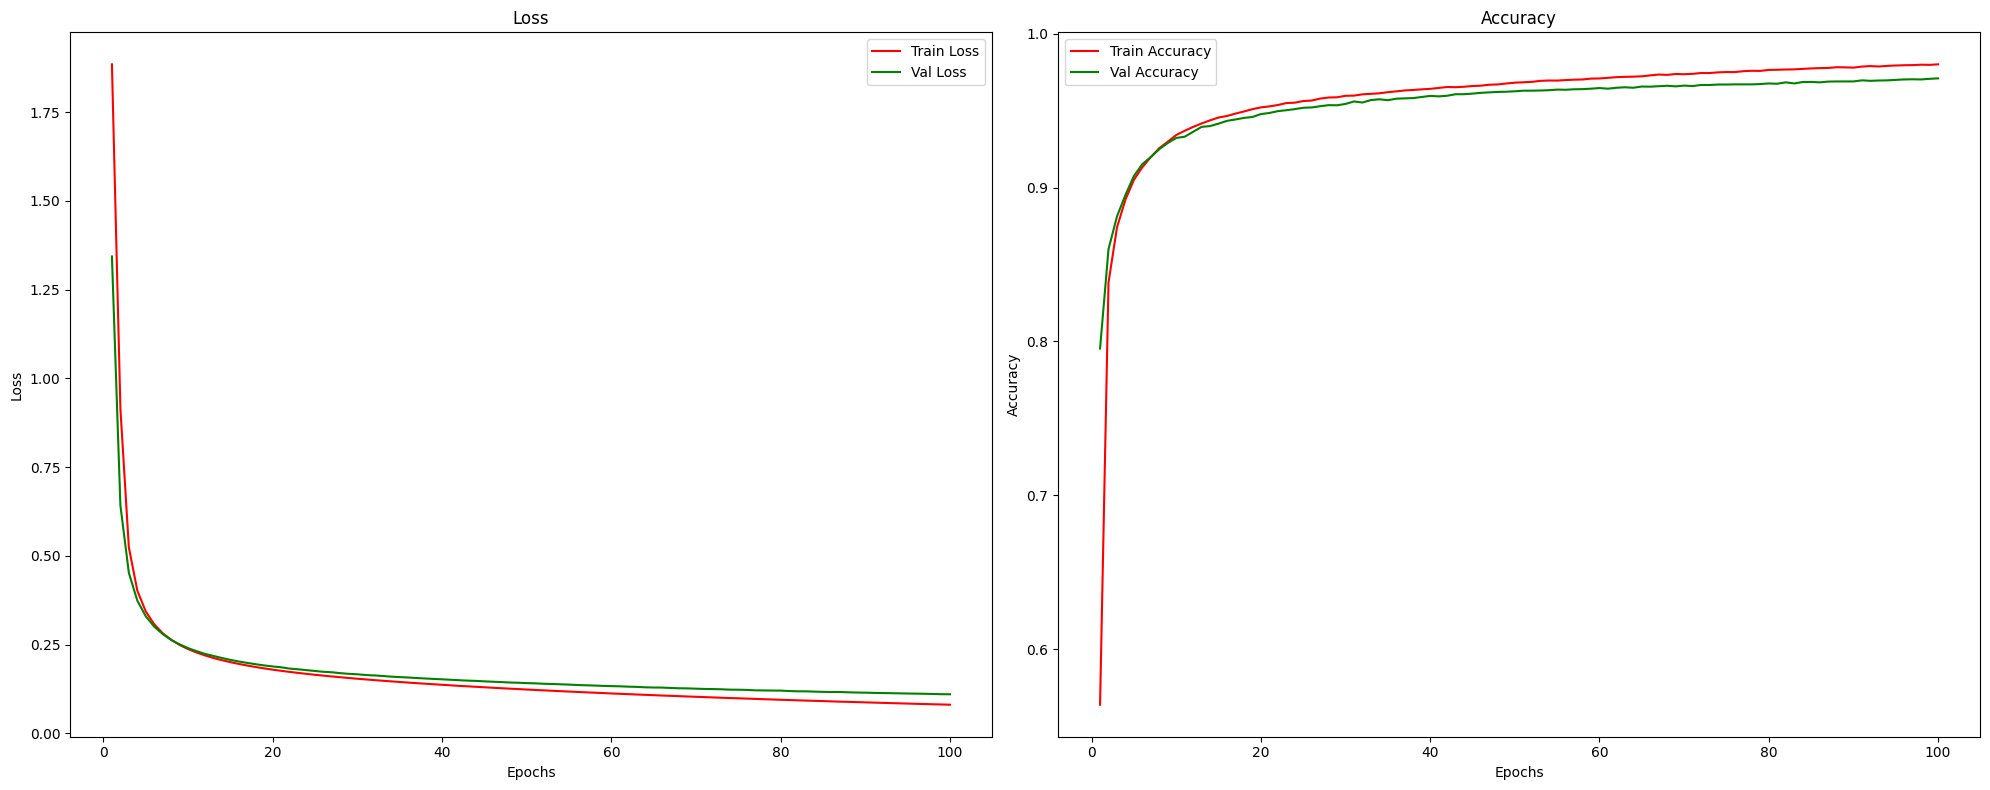

In [ ]:
tr_acc = history4.history['accuracy']
tr_loss = history4.history['loss']
val_acc =history4.history['val_accuracy']
val_loss = history4.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Val Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# To-Do (Final accuracy on validation data)

In [ ]:
# To-Do (Plot training and validation accuracy)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقایسه و تحلیل مدل‌ها
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از شما می‌خواهیم یک نمودار واحد رسم کنید که دقت هرکدام از مدل‌های بالا روی مجموعه‌ی اعتبارسنجی در هر دور با یک خط و رنگ مجزا نشان داده شده باشد.
<br>
پس از رسم این نمودار، لطفاً طبق نتایج به‌دست‌آمده تحلیل خود را از تاثیر هرکدام از هایپرپارامترها یا تغییراتی که در مدل داده‌اید بنویسید. سعی کنید در تحلیل خود دلیلی برای وجود این تفاوت‌ها ارائه دهید.
</font>
</p>

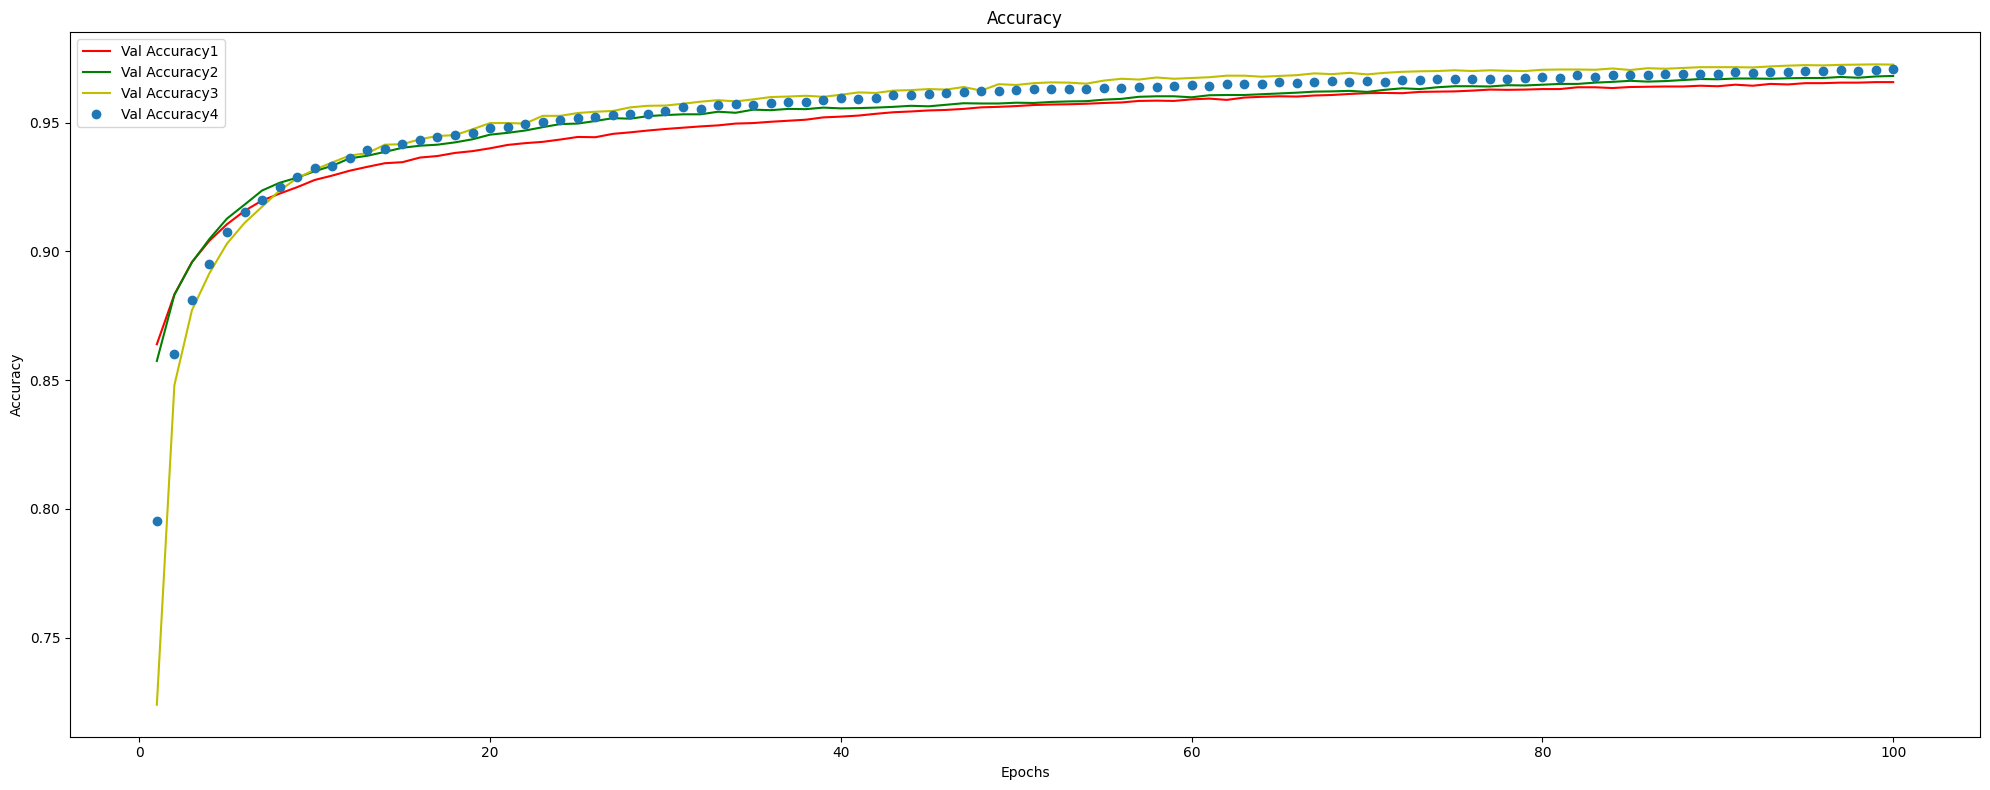

In [ ]:
# tr_acc = history4.history['accuracy']
# tr_loss = history4.history['loss']
val_acc4 =history4.history['val_accuracy']
val_acc3 =history3.history['val_accuracy']
val_acc2 =history2.history['val_accuracy']
val_acc1 =history1.history['val_accuracy']


# val_loss = history4.history['val_loss']

epochs = [i+1 for i in range(len(val_acc))]

plt.figure(figsize=(20, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs, tr_loss, 'r', label='Train Loss')
# plt.plot(epochs, val_loss, 'g', label='Val Loss')
# plt.title('Loss')
# plt.legend()
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

plt.subplot(1, 1, 1)
# plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc1, 'r', label='Val Accuracy1')
plt.plot(epochs, val_acc2, 'g', label='Val Accuracy2')
plt.plot(epochs, val_acc3, 'y', label='Val Accuracy3')
plt.plot(epochs, val_acc4, 'o', label='Val Accuracy4')

plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

مدل سوم
که relu
برای اکتیویشن آن استفاده شده،
دقت بهتری دارد
چرا که این اکتیویشن به کاهش مشکل گرادیان کمک می کند و باعث همگرایی بهتر می شود

In [ ]:
# To-Do (Plot validation accuracy of all models)

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium; color:#0099cc"><font face="vazir" size=3><i>
تحلیل خود را در این بخش بنویسید.
</i></font></p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جست‌وجوی بیشتر
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به صلاح‌دید خود سعی کنید هایپرپارامترهای بیشتری را تنظیم کنید تا به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست یابید. می‌توانید از تکنیک <code>Dropout</code> بهره ببرید، وزن‌ها را رگولارایز کنید، از روش دیگری برای مقداردهی اولیه‌ی وزن‌ها استفاده کنید، تعداد نورون‌ها یا لایه‌ها را کاهش یا افزایش دهید، تابع بهینه‌ساز را تغییر دهید یا نرخ یادگیری متفاوتی را امتحان کنید. همچنین می‌توانید از تنظیم‌کننده‌ی هایپرپارامتر کتابخانه‌ی کراس نیز بهره ببرید. در انتها نیاز است ساختار مدل شما،‌ عملکرد نهایی آن روی مجموعه‌ی آموزشی و نمودار دقت آن در مجموعه‌ی آموزشی و اعتبارسنجی قابل مشاهده باشد.
</font>
</p>

In [ ]:
!pip install keras-tuner -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner


In [ ]:
def build_model(hp):
   model5 = Sequential()
   model5.add(layers.Dense(64,activation='relu',input_shape=(3844,)))
   model5.add(layers.Dense(256,activation='relu'))
   model5.add(layers.Dense(10, activation='softmax'))
   optimizer_SGD = keras.optimizers.SGD(learning_rate=0.001)
   model5.compile( loss= keras.losses.categorical_crossentropy, optimizer=optimizer_SGD, metrics=['accuracy'])
   EarlyStopping(monitor='val_loss', patience=10)
   return model5


build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory=None,
    project_name="Hyper Model",
)

In [ ]:
tuner.search(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot),batch_size=32, epochs=100)

Trial 1 Complete [00h 21m 53s]
val_accuracy: 0.972350001335144

Best val_accuracy So Far: 0.972350001335144
Total elapsed time: 00h 21m 53s


In [ ]:
best_model = tuner.get_best_models()[0]
best_model

In [ ]:
hypermodels = tuner.hypermodel.build(best_model )
his5=hypermodels.fit(X_train_normalized , y_train_onehot, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping],batch_size=32, epochs=100)


Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8942 - accuracy: 0.5133 - val_loss: 1.3439 - val_accuracy: 0.8111
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9044 - accuracy: 0.8451 - val_loss: 0.6319 - val_accuracy: 0.8638
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5149 - accuracy: 0.8769 - val_loss: 0.4461 - val_accuracy: 0.8829
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3963 - accuracy: 0.8941 - val_loss: 0.3695 - val_accuracy: 0.8995
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3389 - accuracy: 0.9062 - val_loss: 0.3262 - val_accuracy: 0.9088
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3035 - accuracy: 0.9143 - val_loss: 0.2975 - val_accuracy: 0.9156
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2789 - accuracy: 0.9205 - val_loss: 0.2771 - val_ac

In [ ]:
eval_result = hypermodels.evaluate(X_test_normalized , y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.1034 - accuracy: 0.9710


In [ ]:
y_pred=hypermodels.predict(X_test_normalized )
y_pred_1=np.argmax(y_pred, axis=1)
y_test_1=np.argmax(y_test_onehot, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
# from sklearn import datasets, metrics, svm

# target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 5', '/ 6', 'class 7', 'class 8', 'class 9']

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نتیجه‌ی نهایی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال که به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست پیدا کرده‌اید نیاز است این مدل نهایی‌شده را طبق نمونه‌های موجود در مجموعه‌ی آزمون ارزیابی کنید. با استفاده از تابع <code>classification_report</code> از کتابخانه‌ی <code>sklearn.metrics</code> گزارش دقت، صحت، بازخوانی و سایر معیارهای مربوط به مدل خود را روی مجموعه‌ی آزمون گزارش دهید.
</font>
</p>

In [ ]:
print(classification_report(y_test_1 ,y_pred_1, labels=[0,1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       975
           1       0.97      0.99      0.98       999
           2       0.95      0.96      0.95       992
           3       0.95      0.96      0.95      1005
           4       0.97      0.92      0.94       991
           5       0.99      0.98      0.99      1020
           6       0.96      0.96      0.96       992
           7       0.99      0.99      0.99      1006
           8       0.98      0.99      0.99      1024
           9       0.97      0.97      0.97       996

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

